Random Walks and Monte Carlo

In [6]:
import numpy as np
import pandas as pd
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt=1/steps_per_year
    n_steps=int(n_years*steps_per_year)
    xi=np.random.normal(size=(n_steps, n_scenarios))
    rets=mu*dt+sigma*np.sqrt(dt)*xi
    rets=pd.DataFrame(rets)
#ToPrices?
    prices=s_0*(1+rets).cumprod()
    return prices

In [14]:
p=gbm(n_scenarios=3)

In [15]:
p.shape

(120, 3)

In [16]:
p.head()

,0,1,2
0,104.933190,105.472048,96.130985
1,104.284507,112.738125,91.028388
2,103.329828,111.066056,85.025502
3,106.935791,113.642858,83.169048
4,109.500492,115.565738,81.687776


In [11]:
#each coulumn is a possible way of which the stock price can evolve

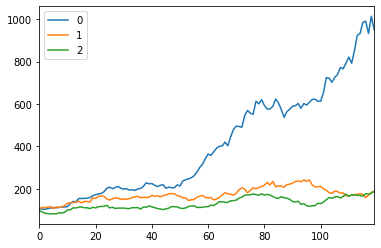

In [17]:
p.plot()

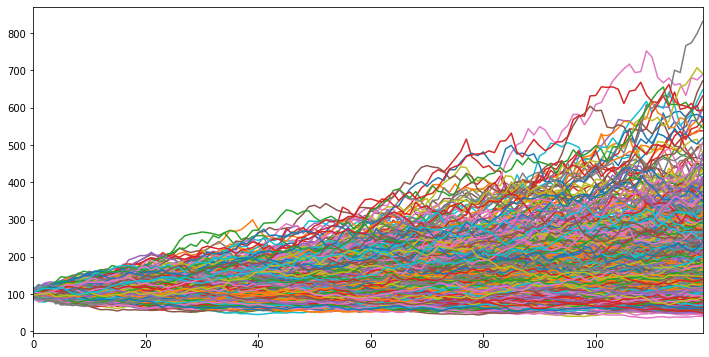

In [19]:
p=gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [24]:

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt=1/steps_per_year
    n_steps=int(n_years*steps_per_year)
    rets_plus_1=np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
#ToPrices?
    prices=s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [22]:
%timeit gbm0(n_years=5, n_scenarios=1000)

760 ms ± 188 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit gbm1(n_years=5, n_scenarios=1000)

258 ms ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


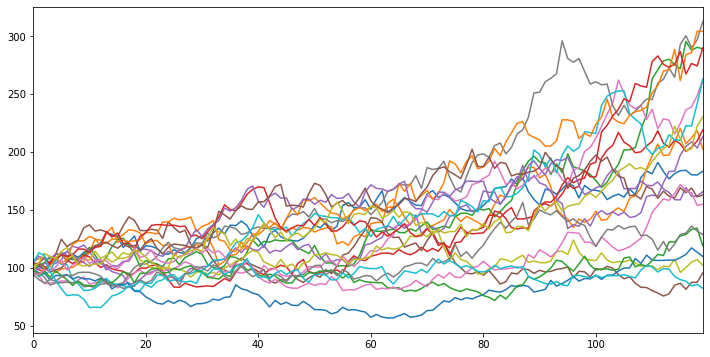

In [28]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [29]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt=1/steps_per_year
    n_steps=int(n_years*steps_per_year)
    rets_plus_1=np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0]=1
#ToPrices?
    prices=s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

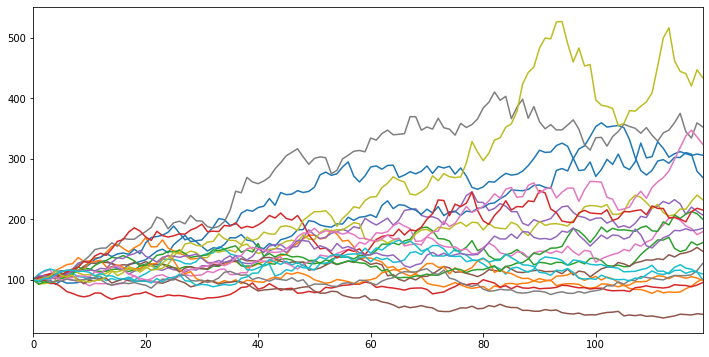

In [30]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [31]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,94.264037,97.212313,102.791541,95.750746,95.455311,99.327238,99.910732,96.504934,108.128420,102.540787
2,95.275684,97.451579,98.907941,103.312484,94.109769,101.225175,97.905709,94.990814,112.754234,103.686496
3,100.473684,101.261135,99.306333,101.643917,94.634077,103.533715,108.047844,89.097008,106.135756,98.915150
4,107.963599,102.430533,106.177083,91.291603,94.515065,108.157875,107.717119,87.712948,101.438428,102.236594
